In [98]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [100]:
data_url = "/content/gdrive/MyDrive/UNI/Big Data Problem/Manhattan12.csv"
df = pd.read_csv(data_url)
df.shape

#df = pd.read_csv('Manhattan12.csv')
#df.shape

(27399, 21)

In [101]:
df.head(10)

,Manhattan Rolling Sales File. All Sales From August 2012 - August 2013.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Sales File as of 08/30/2013 Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Neighborhood Name 09/06/13, Descriptive Data i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
5,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
6,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
7,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
8,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013
9,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1311,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,705,568",21/05/2013


In [102]:
# header is defined so that text at top of csv is skipped
df = pd.read_csv(data_url, header = 4)
#df = pd.read_csv("Manhattan12.csv", header = 4)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013


In [103]:
df = df.rename(columns={"SALE\nPRICE":"SALE PRICE", "APART\nMENT\nNUMBER":"APARTMENT NUMBER"}) #rename columns

In [104]:
df.head()


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013


In [105]:
df.dtypes

BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                 object
COMMERCIAL UNITS                   int64
TOTAL UNITS                       object
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object

In [106]:
# list all numerical variables 
# put this at end once all conversions have been done 
numerical = ['int64', 'float64']
df_nums = df.select_dtypes(include=numerical)

list(df_nums)

['BOROUGH',
 'BLOCK',
 'LOT',
 'ZIP CODE',
 'COMMERCIAL UNITS',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE']

In [107]:
# list all categorical values

categorical = ['object']
df_cat = df.select_dtypes(include=categorical)

list(df_cat)

['NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'EASE-MENT',
 'BUILDING CLASS AT PRESENT',
 'ADDRESS',
 'APARTMENT NUMBER',
 'RESIDENTIAL UNITS',
 'TOTAL UNITS',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'BUILDING CLASS AT TIME OF SALE',
 'SALE PRICE',
 'SALE DATE']

In [108]:
def price_to_int(column):
    df[column] = df[column].str.replace(',','', regex=True).str.replace('$','', regex=True).astype('int')
    
price_to_int('SALE PRICE')
price_to_int('LAND SQUARE FEET')
price_to_int('GROSS SQUARE FEET')

df.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,2214693,20/05/2013
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1654656,16/05/2013
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1069162,23/05/2013
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1374637,15/05/2013
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1649565,13/05/2013
5,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1311,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,1705568,21/05/2013
6,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1312,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,2036500,10/07/2013
7,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1314,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,2214693,04/06/2013
8,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1317,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,2418343,31/05/2013
9,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1318,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,2749275,24/05/2013


In [109]:
df.replace(0, np.nan, inplace=True) 
df.replace("0", np.nan, inplace=True)

print("\n\nTotal NaN at each column in DataFrame : \n\n", df.isnull().sum()) #summarise null values

# df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
# df = df.drop(columns=['BOROUGH', 'EASE-MENT', 'APARTMENT NUMBER']) #drop columns
# df.drop_duplicates(keep=False, inplace=True) #drop duplicates
# df=df.dropna() #drop nas



Total NaN at each column in DataFrame : 

 BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              1
RESIDENTIAL UNITS                 16372
COMMERCIAL UNITS                  23962
TOTAL UNITS                        9704
LAND SQUARE FEET                  22906
GROSS SQUARE FEET                 23069
YEAR BUILT                         6441
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                         7593
SALE DATE                             0
dtype: int64


In [110]:
df.shape

(27395, 21)

In [111]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], dayfirst=True)
df = df.drop(columns=['BOROUGH', 'EASE-MENT', 'APARTMENT NUMBER']) #drop columns


# df.drop_duplicates(keep=False, inplace=True) #drop duplicates
df = df.drop_duplicates(subset=df.columns.difference(['SALE DATE']))
df = df.interpolate(method ='ffill', limit_direction ='forward')

df = df.sort_values('SALE PRICE')

# df = df.fillna(method ='pad')
df=df.dropna(subset=["SALE PRICE"]) #drop nas

In [112]:
df.shape

(23820, 18)

In [113]:
print("\n\nTotal NaN at each column in DataFrame : \n\n", df.isnull().sum()) #summarise null values



Total NaN at each column in DataFrame : 

 NEIGHBORHOOD                       0
BUILDING CLASS CATEGORY            0
TAX CLASS AT PRESENT               0
BLOCK                              0
LOT                                0
BUILDING CLASS AT PRESENT          0
ADDRESS                            0
ZIP CODE                           0
RESIDENTIAL UNITS                 18
COMMERCIAL UNITS                  20
TOTAL UNITS                       17
LAND SQUARE FEET                  18
GROSS SQUARE FEET                 18
YEAR BUILT                        17
TAX CLASS AT TIME OF SALE          0
BUILDING CLASS AT TIME OF SALE     0
SALE PRICE                         0
SALE DATE                          0
dtype: int64


In [114]:
df.dtypes

NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                      int64
LOT                                        int64
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
ZIP CODE                                 float64
RESIDENTIAL UNITS                         object
COMMERCIAL UNITS                         float64
TOTAL UNITS                               object
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                               float64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                               float64
SALE DATE                         datetime64[ns]
dtype: object

In [115]:
df.head(10)

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
22314,UPPER EAST SIDE (79-96),13 CONDOS - ELEVATOR APARTMENTS,2,1513,1104,R4,171 EAST 84TH STREET,10028.0,1,2.0,1,20070.0,231891.0,1987.0,2,R4,1.0,2013-05-28
16193,MIDTOWN WEST,28 COMMERCIAL CONDOS,4,1265,1099,R5,30 ROCKEFELLER PLAZA,10020.0,1,1.0,1,12150.0,54568.0,1937.0,4,R5,1.0,2013-03-19
16194,MIDTOWN WEST,28 COMMERCIAL CONDOS,4,1265,1100,R5,30 ROCKEFELLER PLAZA,10020.0,1,1.0,1,12150.0,54568.0,1937.0,4,R5,1.0,2013-03-19
16195,MIDTOWN WEST,28 COMMERCIAL CONDOS,4,1265,1101,R5,30 ROCKEFELLER PLAZA,10020.0,1,1.0,1,12150.0,54568.0,1937.0,4,R5,1.0,2013-03-19
16196,MIDTOWN WEST,28 COMMERCIAL CONDOS,4,1265,1102,R5,30 ROCKEFELLER PLAZA,10020.0,1,1.0,1,12150.0,54568.0,1937.0,4,R5,1.0,2013-03-19
7213,KIPS BAY,11A CONDO-RENTALS,2,926,1002,RR,346 EAST 21ST STREET,10010.0,30,1.0,30,4000.0,17222.0,1910.0,2,RR,1.0,2013-02-08
16197,MIDTOWN WEST,28 COMMERCIAL CONDOS,4,1265,1103,R5,30 ROCKEFELLER PLAZA,10020.0,1,1.0,1,12150.0,54568.0,1937.0,4,R5,1.0,2013-03-19
16198,MIDTOWN WEST,28 COMMERCIAL CONDOS,4,1265,1104,R5,30 ROCKEFELLER PLAZA,10020.0,1,1.0,1,12150.0,54568.0,1937.0,4,R5,1.0,2013-03-19
16199,MIDTOWN WEST,28 COMMERCIAL CONDOS,4,1265,1105,R5,30 ROCKEFELLER PLAZA,10020.0,1,1.0,1,12150.0,54568.0,1937.0,4,R5,1.0,2013-03-19
16200,MIDTOWN WEST,28 COMMERCIAL CONDOS,4,1265,1106,R5,30 ROCKEFELLER PLAZA,10020.0,1,1.0,1,12150.0,54568.0,1937.0,4,R5,1.0,2013-03-19


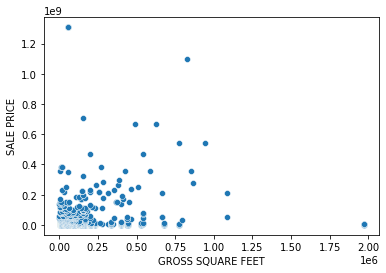

<Axes: xlabel='LAND SQUARE FEET', ylabel='SALE PRICE'>

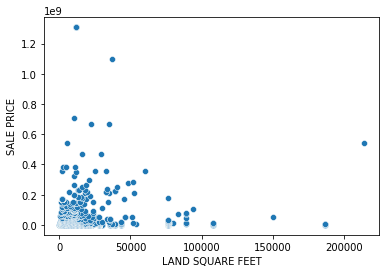

In [116]:
sns.scatterplot(data=df, x="GROSS SQUARE FEET", y="SALE PRICE")
plt.show()
sns.scatterplot(data=df, x="LAND SQUARE FEET", y="SALE PRICE")

count    2.382000e+04
mean     5.522625e+06
std      4.562574e+07
min      1.000000e+00
25%      4.500000e+05
50%      8.600000e+05
75%      1.975000e+06
max      1.307965e+09
Name: SALE PRICE, dtype: float64

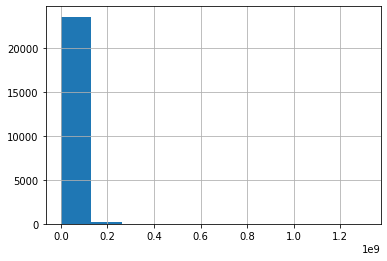

In [117]:
df['SALE PRICE'].hist()
df['SALE PRICE'].describe()

In [118]:
q1, q3= np.percentile(df["SALE PRICE"].to_numpy(),[25,75])
iqr = q3 - q1
lower_bound = q1 -(0.25 * iqr) 
upper_bound = q3 +(0.25 * iqr) 
print("LB: ", lower_bound)
print("UB: ", upper_bound)
print("Q1: ", q1)
print("Q3: ", q3)
print("IQR: ", iqr)

LB:  68750.0
UB:  2356250.0
Q1:  450000.0
Q3:  1975000.0
IQR:  1525000.0


In [127]:
q1, q3= np.percentile(df["GROSS SQUARE FEET"].to_numpy(),[25,75])
iqr = q3 - q1
lower_bound = q1 -(0.25 * iqr) 
upper_bound = q3 +(0.25 * iqr) 
print("LB: ", lower_bound)
print("UB: ", upper_bound)
print("Q1: ", q1)
print("Q3: ", q3)
print("IQR: ", iqr)

LB:  nan
UB:  nan
Q1:  nan
Q3:  nan
IQR:  nan


In [119]:
def remove_outliers(df, column, whisker_width):
    # Calculate Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter]                                                     

# Example for whiskers = 1.5, as requested by the OP
df = remove_outliers(df, 'SALE PRICE', whisker_width=0.25)

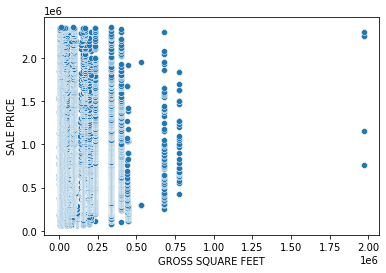

<Axes: xlabel='LAND SQUARE FEET', ylabel='SALE PRICE'>

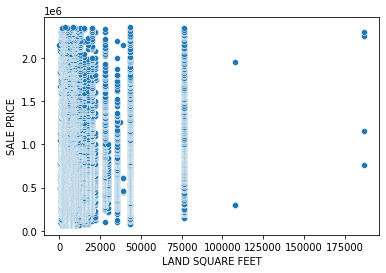

In [120]:
sns.scatterplot(data=df, x="GROSS SQUARE FEET", y="SALE PRICE")
plt.show()
sns.scatterplot(data=df, x="LAND SQUARE FEET", y="SALE PRICE")

count    1.651100e+04
mean     8.749291e+05
std      5.342154e+05
min      6.902000e+04
25%      4.733950e+05
50%      7.331400e+05
75%      1.200000e+06
max      2.355000e+06
Name: SALE PRICE, dtype: float64

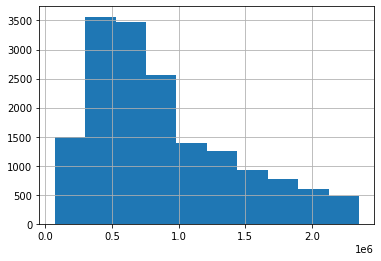

In [121]:
df['SALE PRICE'].hist()
df['SALE PRICE'].describe()

In [122]:
df.shape

(16511, 18)

In [123]:
df.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
15176,MIDTOWN WEST,25 LUXURY HOTELS,4,1009,37,H2,102 WEST 57TH STREET,10019.0,1,2.0,2,7532.0,112850.0,2007.0,4,H2,69020.0,2012-11-21
13659,MIDTOWN WEST,13 CONDOS - ELEVATOR APARTMENTS,2,1047,2030,R4,322 WEST 57 STREET,10019.0,1,5.0,1,2510.0,5272.0,1978.0,2,R4,69941.0,2013-01-09
20874,UPPER EAST SIDE (79-96),,4,1537,1920,RS,1623 3 AVENUE,10128.0,5,1.0,1,2008.0,7140.0,1975.0,4,RS,70000.0,2013-06-11
5973,HARLEM-CENTRAL,10 COOPS - ELEVATOR APARTMENTS,2,2029,29,D4,"2460 7TH AVENUE, 54",10030.0,52,2.0,54,12490.0,69331.0,1950.0,2,D4,70000.0,2013-06-12
24921,UPPER WEST SIDE (59-79),17 CONDOPS,2,1158,1007,R9,"160 WEST END AVENUE, R24",10023.0,1,1.0,1,1941.0,4126.0,1963.0,2,R9,70000.0,2012-09-12


In [124]:
from pathlib import Path  
filepath = Path('out.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)  